# Technical Report
1. Summarize Goals
2. Metrics for Success
3. Variables of Interest
4. Removal of any outliers or data imputation
5. Summarize statistical anallysis
6. Modeling selection, implementation, evaluation, & inference
7. Executive Summary
8. Clear Plot and Visuals

## 1. Summarize Goals
- My goal for this project is to develope a "smart" food planner that is able to recommend recipes based on a users inputted ingredients. This project also aims to accommodate partial recipe matches as well as allowing the user to filter recipes based on certain preferences (time, nutritional information)

## 2. Metrics for Success
- Returned recipe accuracy: how accurate are the recommended recipes compared to the users inputted ingredients
- Cosine similarity score: how close is the similarity score between the users input and recipes

## 3. Variables of Interest
- 'ingredients_str': a recipes cleaned listed ingredients
- 'total_time': how long a recipe takes to complete
- 'calories': nutritional information per serving
- 'protein': nutritional information per serving
- 'fat': nutritional information per serving
- 'carbs': nutritional information per serving
- 'title': the recipes name, display and recognition purposes
- 'intro': a brief description of the recipe, for display purposes only
- 'recipe_url': url to the original recipe, on the website allrecipes.com, provides directions and ingredient quantites 

## 4. Removal of any outliers or data imputation
#### Nulls
- Null values in 'intro', 'prep_time', 'cook_time', 'total_time', 'servings', 'nutrition', 'recipe_url'
- Dropped a total of 161 rows containing null values (64 rows in recipe_urls, 23 rows in intro, 88 rows in nutrition, 4 rows in serving, 9 rows in total_time)
- 14 null rows remaining in column prep_time: The user will have the option to filter recipes based on total time so it's not vital that all prep_time rows are filled
- 187 null rows remaining in column cook_time: Same reasoning used from prep_time
#### Duplicates
- There were 273 duplicated recipes in the data frame
- 273 rows dropped from dataframe
- Left with 1_870 unique recipes
#### Outliers
- There were outliers in terms of total time and nutritional information however no outliers were removed because they were still valid recipes with higher values
#### Data Imputation
- No data was manually inputed

## 5. Summarize statistical anallysis
#### total_time
- maximum time: 5_833 mins
- minimum time: 5 mins
- average time: 117.06 mins
#### calories
- maximum: 4_455 kcal
- minimum: 14 kcal
- average: 462.44 kcal
#### fats
- maximum: 245 grams
- minimum: 0 grams
- average: 24.52 grams
#### carbs
- maximum: 746 grams
- minimum: 0 grams
- average: 36.06 grams
#### protein
- maximum: 137 grams
- minimum: 0 grams
- average: 24.99 grams

## 6. Modeling selection, implementation, evaluation, & inference
- Used TF-IDF vectorization of ingredients to calculate similarity between user input and recipe list
- Calculated cosine similarity on TF-IDF to retrieve top recipe matches
- Also used Word2Vec to use embedding on ingredients from the ingredients list
- Calculated cosime similarity on the ingredients embeddings to retreive top recipe matches (slighly more accurate results than TF-IDF)
- Evaluation: Manual user testing on 15 input scenarios returned roughly 75% accurate recipes

## 7. Executive Summary
- This projects produces a semi accurate smart food planner that is designed to help users make the most of the ingredients they have on hand. By inputting what available ingredients they have, users receive personal recipe recommendations that match their given list. This is ideal for reducing food waste and saving money. The system was built using Word2Vec (an unsupervised model) that created embeddings for each ingredient within a given recipe and them a total for each recipe as a whole. Using the cosine similarity between recipes a series of like recipes are then returned to the user with the title, total_time, nutritional information, and a direct link to the original recipe where they can find more information. Recipes can be filtered on total_time, and nutritional information. The final model when manually testing on different pantry scenarios, it returned accurate and helpful recipes about 75% of the time, in terms of the scope for this project I am happy with that accuracy.

## 8. Clear Plot and Visuals

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df = pd.read_csv('../data/recipes_cleaned.csv')

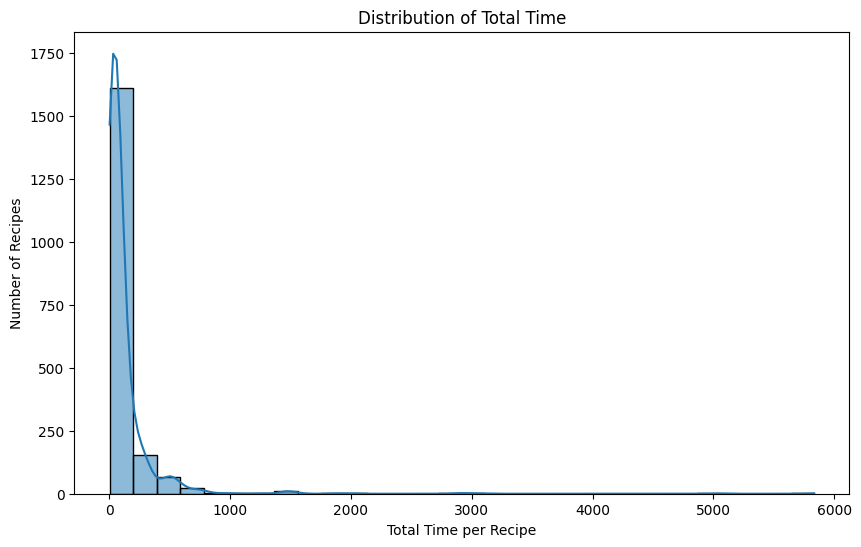

In [8]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['total_time'], bins=30, kde=True)  # `kde=True` adds a smoothed curve

# Add labels
plt.xlabel("Total Time per Recipe")
plt.ylabel("Number of Recipes")
plt.title("Distribution of Total Time");

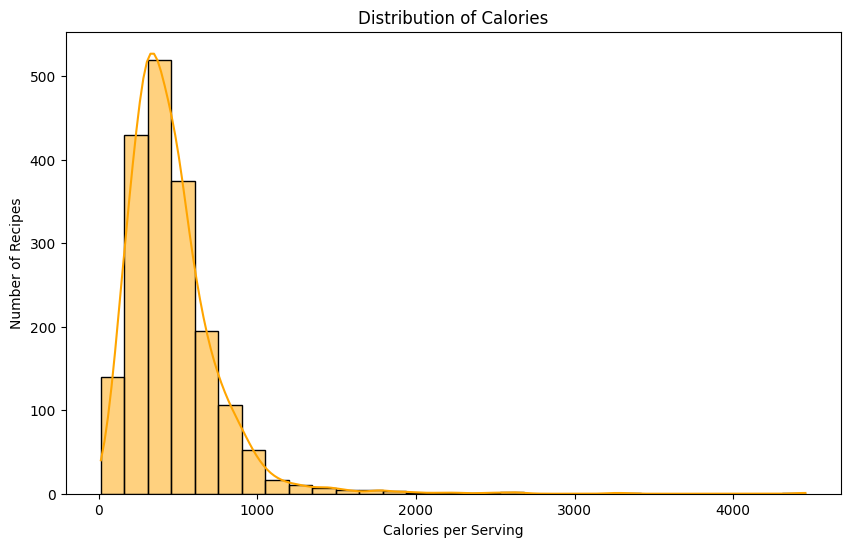

In [15]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=30, kde=True, color= 'orange')  # `kde=True` adds a smoothed curve

# Add labels
plt.xlabel("Calories per Serving")
plt.ylabel("Number of Recipes")
plt.title("Distribution of Calories");

# The graph is right skewed with the majority of recipes having calories around the 400-600 kcals per recipe

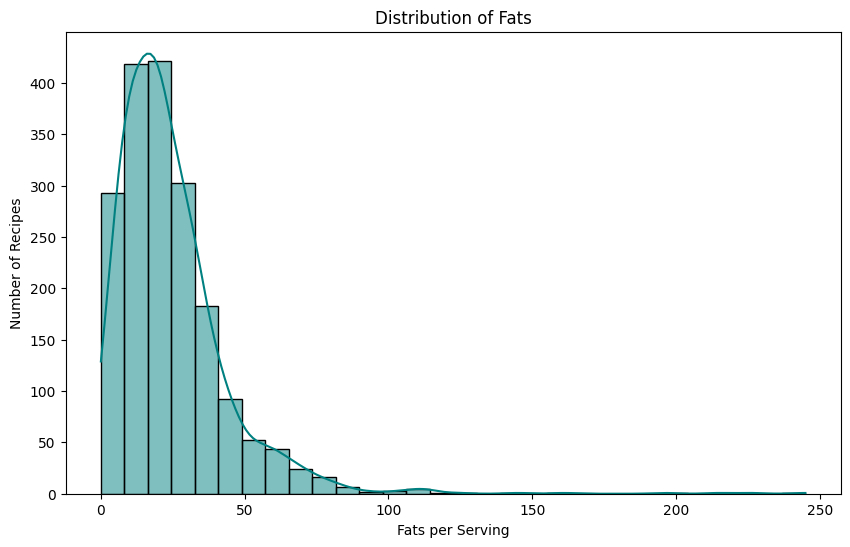

In [14]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['fat'], bins=30, kde=True, color = 'teal')  # `kde=True` adds a smoothed curve

# Add labels
plt.xlabel("Fats per Serving")
plt.ylabel("Number of Recipes")
plt.title("Distribution of Fats");

# The graph is right skewed with the majority of recipes having the amount of fats per serving around 15-30 grams per.

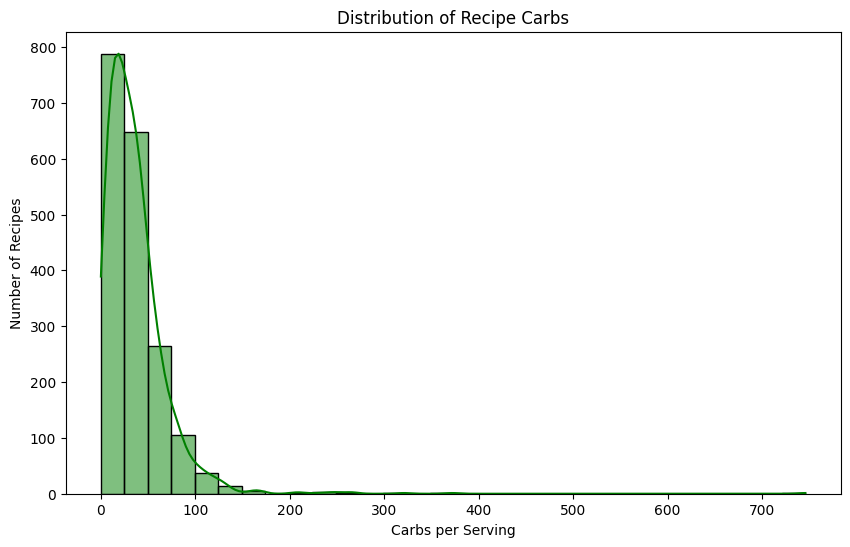

In [20]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['carbs'], bins=30, kde=True, color = 'green')  # `kde=True` adds a smoothed curve

# Add labels
plt.xlabel("Carbs per Serving")
plt.ylabel("Number of Recipes")
plt.title("Distribution of Recipe Carbs");

# The grpah is right skewed with the majority of recipes seeming to be low carbs around that 25 grams per serving amount

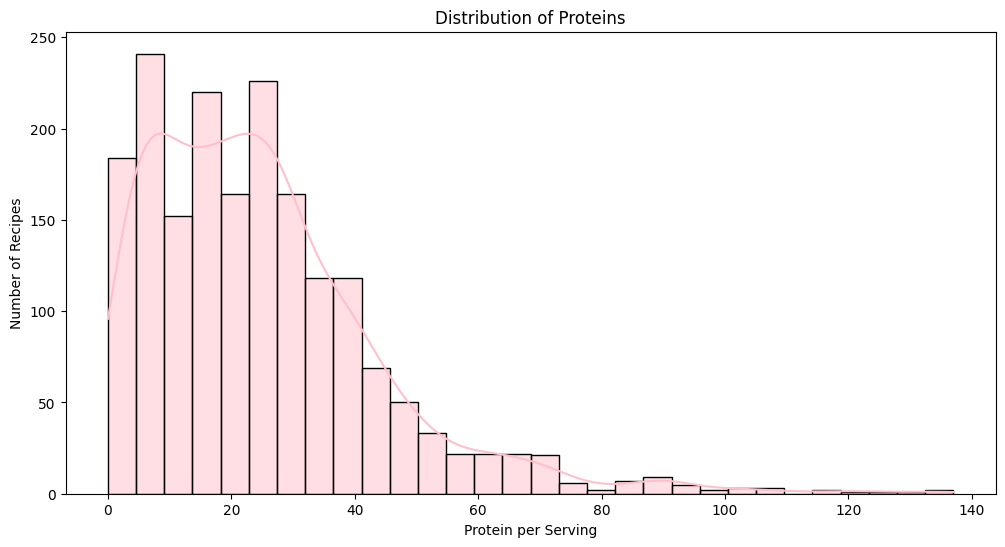

In [21]:
# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['protein'], bins=30, kde=True, color = 'pink')  # `kde=True` adds a smoothed curve

# Add labels
plt.xlabel("Protein per Serving")
plt.ylabel("Number of Recipes")
plt.title("Distribution of Proteins");

# The distribution of protein is the most spread out of all the nutritional information. The graph is still right skewed, 
# however there are a lot more somewhat equally distributed amount of proetin from about 30 grams and below